## EDA/Feature Extraction

In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats


%matplotlib inline

# load dataset
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [22]:
train.shape
30471*292 # total number of observations

8897532

8,897,532 total observations

In [28]:
# date range of properties in training set
train.agg({'timestamp': ['min', 'max']})

,timestamp
min,2011-08-20
max,2015-06-30


In [78]:
np.around(train['price_doc'].describe())

count        30471.0
mean       7123035.0
std        4780111.0
min         100000.0
25%        4740002.0
50%        6274411.0
75%        8300000.0
max      111111112.0
Name: price_doc, dtype: float64

In [127]:
sub_areas = train['sub_area'].drop_duplicates()

len(sub_areas)

146

In [131]:
price_by_region = train.groupby(train['sub_area'])

price_by_region.agg(['min', 'max', 'mean'])

id                      full_sq                   \
                         min    max          mean     min   max       mean   
sub_area                                                                     
Ajeroport                157  30280  13748.097561      28   151  56.235772   
Akademicheskoe           182  30018  15844.890995      27   226  58.677725   
Alekseevskoe             261  30359  14815.510000      27   108  50.450000   
Altuf'evskoe             758  30068  14000.500000      17    93  46.455882   
Arbat                   1369  27624  12899.733333      31   151  56.200000   
Babushkinskoe             86  30029  12756.788618      18   100  49.520325   
Basmannoe                  5  30443  14209.846939      28   177  61.163265   
Begovoe                 1078  30415  14349.783333      28   133  57.066667   
Beskudnikovskoe          162  30419  14708.192771      21   116  50.289157   
Bibirevo                   1  30439  15057.643478      30    98  49.578261   
Birjulevo Vostochnoe     145  29715  15618.115672      25  5326  67.365672   
Birjulevo Zapadnoe       224  29937  14633.565217      29    74  45.086957   
Bogorodskoe               29  30457  14399.632787      17   124  46.990164   
Brateevo                  45  29882  15610.285714      33   100  50.934066   
Butyrskoe                342  30298  14353.613861      29   107  51.445545   
Caricyno                  38  30242  14959.900000      17    98  41.231818   
Cheremushki              252  30205  14773.911392      30   166  49.626582   
Chertanovo Central'noe    24  30297  13791.806122      26   148  49.770408   
Chertanovo Juzhnoe       208  30436  14614.622711       1   132  49.747253   
Chertanovo Severnoe      119  30369  15436.285000      22   106  48.195000   
Danilovskoe               41  30403  16634.608040      25   156  56.000000   
Dmitrovskoe               74  29732  14408.643678      22    85  44.477011   
Donskoe                   54  30437  14090.888889      30   136  60.029630   
Dorogomilovo             102  29157  14923.642857      29   112  55.982143   
Filevskij Park            92  30465  18693.060811      24   412  57.364865   
Fili Davydkovo            26  30309  14715.912409      26   174  52.124088   
Gagarinskoe              652  29904  13535.835443      30   178  64.164557   
Gol'janovo                20  30149  14073.610169       5   116  45.833898   
Golovinskoe              131  30345  14713.080357      17    96  45.732143   
Hamovniki                 96  30168  14243.288889      11   187  69.555556   
...                      ...    ...           ...     ...   ...        ...   
Severnoe Izmajlovo       146  29185  14201.938650      17   112  42.736196   
Severnoe Medvedkovo       66  29896  14758.778443      21    85  49.000000   
Severnoe Tushino          23  30466  12101.631206      27    89  50.705674   
Shhukino                 191  29471  14046.174194      20   275  54.632258   
Silino                   123  29999  14051.570000      34   120  56.690000   
Sokol                     59  30161  15724.097222      31   187  60.666667   
Sokol'niki                 7  29490  14183.183333      25   125  56.766667   
Sokolinaja Gora          147  29739  15675.515957      13   111  50.319149   
Solncevo                  99  30462  16872.420428      18   353  51.266033   
Staroe Krjukovo           35  29328  13862.500000      32    94  51.380435   
Strogino                  31  28733  13589.036545      19   172  54.830565   
Sviblovo                 253  30467  18694.557252      26   119  51.374046   
Taganskoe                 73  30352  15047.965318      29   202  54.745665   
Tekstil'shhiki             3  30303  15497.073826      15   113  49.020134   
Teplyj Stan               79  30111  15168.327273      25   165  53.278788   
Timirjazevskoe           105  29497  14881.201299      26   186  50.220779   
Troickij okrug          2872  30278  16184.569620      18   144  67.708861   
Troparevo-Nikulino        93  30120  14925.61111

(array([  1.,   0.,   0.,   4.,   7.,  31.,  51.,  33.,  16.,   3.]),
 array([ 13.81551156,  14.11566583,  14.41582009,  14.71597436,
         15.01612863,  15.3162829 ,  15.61643717,  15.91659144,
         16.2167457 ,  16.51689997,  16.81705424]),
 <a list of 10 Patch objects>)

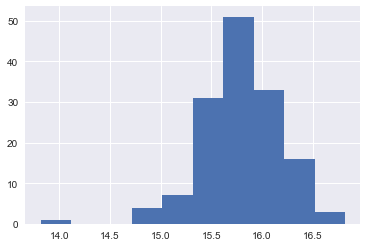

In [375]:
price_by_region.nlargest(20)
price_by_region.nsmallest(20)

plt.hist(np.log1p(price_by_region))

In [135]:
# corr = train.corr()

train.shape

(30471, 292)

In [136]:
train.sort_index()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000


In [186]:
train.loc[train['floor'], 'floor'].describe()
len(train.loc[train['max_floor'].isnull() ,'max_floor'])

9572

In [206]:
train.loc[train['max_floor'].isnull(), :].apply(lambda x: x.isnull()).describe().loc['freq']

# columns are fairly consistently null across all features that are null

id                                       9572
timestamp                                9572
full_sq                                  9572
life_sq                                  7330
floor                                    9405
max_floor                                9572
material                                 9572
build_year                               9572
num_room                                 9572
kitch_sq                                 9572
state                                    9572
product_type                             9572
sub_area                                 9572
area_m                                   9572
raion_popul                              9572
green_zone_part                          9572
indust_part                              9572
children_preschool                       9572
preschool_quota                          7371
preschool_education_centers_raion        9572
children_school                          9572
school_quota                      

In [271]:
# material_price = train.loc[train['material'].notnull(), :].groupby('price_doc')

materials = train.groupby('material')
materials['price_doc'].describe()

train.loc[train['material'] == 3.0, :]

train.loc[train['state']== 33, :]

# sns.boxplot(x='material', y='price_doc', data=train)
# sns.boxplot(x=train['material'], y=train['material'].count())

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
10089,10092,2013-08-27,37,16.0,8.0,12.0,1.0,20052009.0,1.0,9.0,...,46,8,2,10,31,2,7,91,11,9000000


In [321]:
len(train.loc[train['build_year'].isnull(),'build_year']) #13,605 rows without build year

build_year = train.loc[train['build_year'].notnull(),:].groupby('build_year')['build_year'].count()

build_year



build_year
0.0           530
1.0           368
3.0             2
20.0            1
71.0            1
215.0           1
1691.0          1
1860.0          2
1876.0          1
1886.0          1
1890.0          5
1895.0          1
1896.0          2
1900.0          2
1904.0          1
1905.0          1
1906.0          1
1907.0          2
1910.0          5
1911.0          1
1912.0          5
1914.0          3
1915.0          5
1917.0         16
1920.0          1
1924.0          3
1925.0          1
1926.0          8
1927.0         10
1928.0         12
             ... 
1991.0         93
1992.0        139
1993.0        115
1994.0        160
1995.0        149
1996.0        162
1997.0        139
1998.0        141
1999.0        125
2000.0        130
2001.0        177
2002.0        214
2003.0        193
2004.0        220
2005.0        176
2006.0        242
2007.0        219
2008.0        234
2009.0        176
2010.0        132
2011.0        162
2012.0        233
2013.0        464
2014.0        919

In [323]:
train.loc[train['build_year'] == 4965.0]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
15220,15223,2014-02-19,41,24.0,4.0,9.0,2.0,4965.0,2.0,5.0,...,32,4,0,32,57,0,16,119,14,8400000


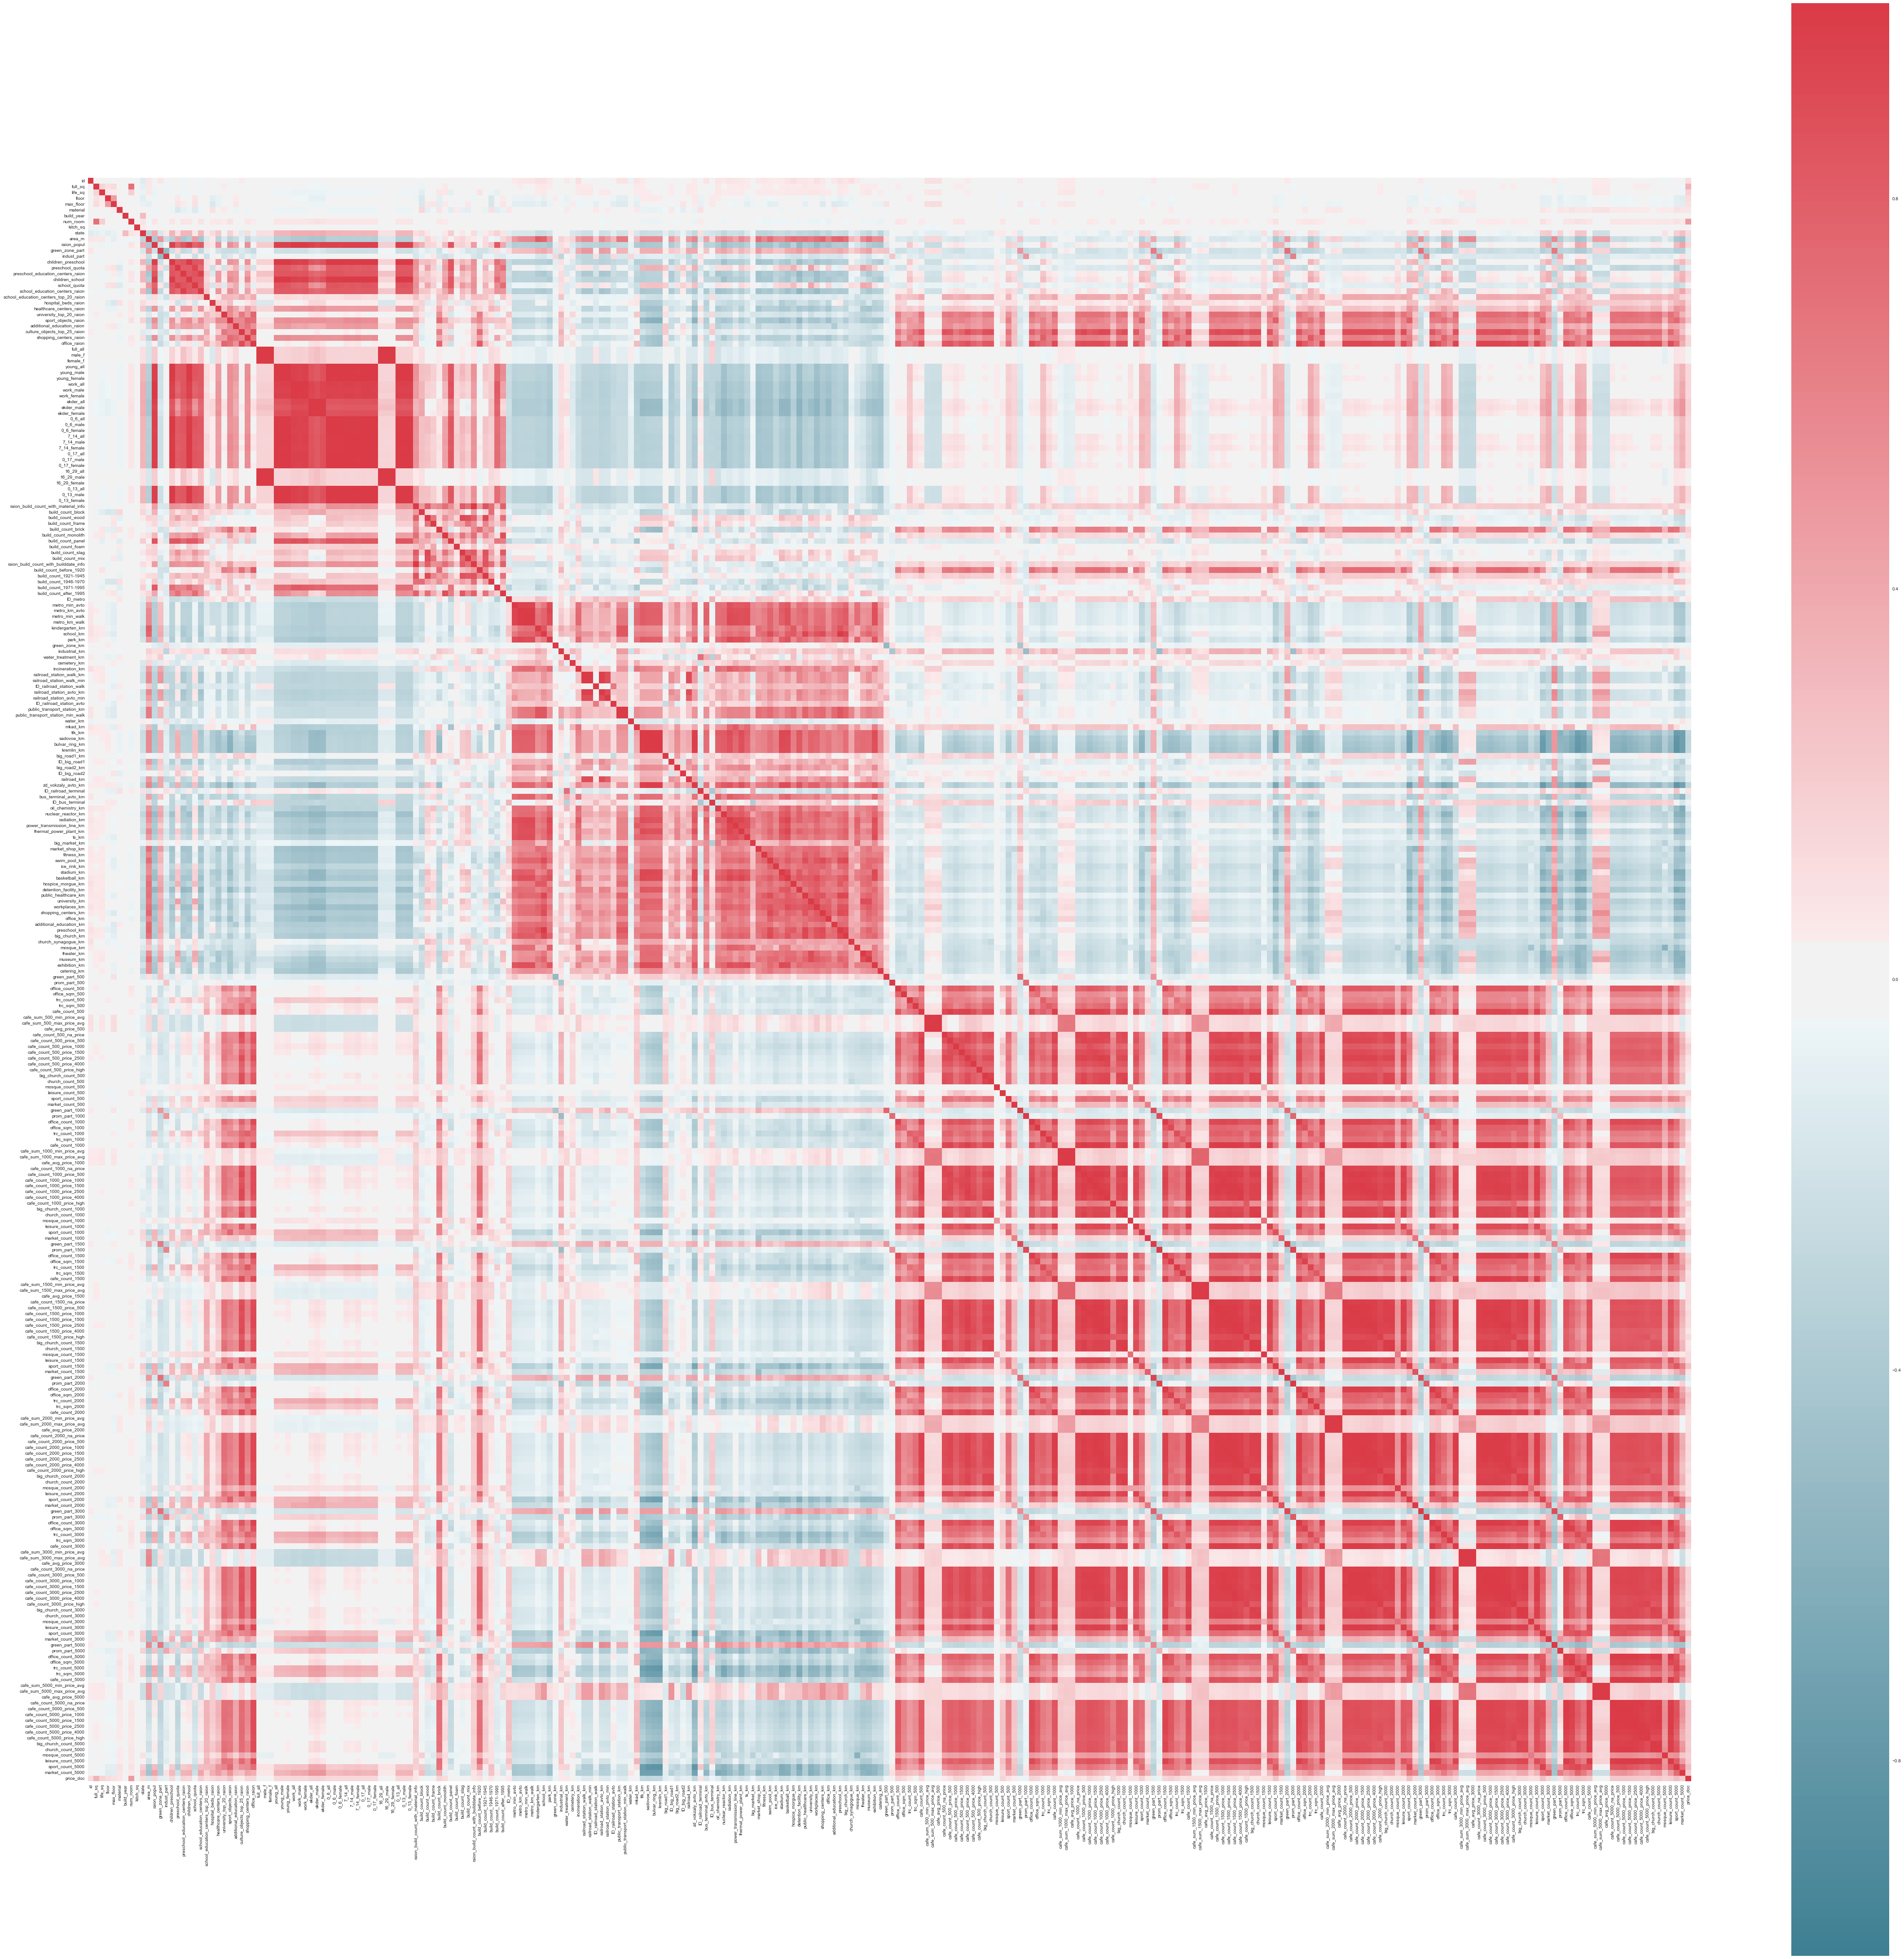

In [328]:
f, ax = plt.subplots(figsize=(80, 80))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [334]:
corr_matrix = train.corr() 

In [385]:
corr_values = np.arange(0,1,.1)

corr_matrix.apply(lambda x: x > 0.7, axis =1)

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
full_sq,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
life_sq,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floor,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
max_floor,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
material,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
build_year,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
num_room,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
kitch_sq,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
state,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
